<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/heart_dataset_train_all.csv')
df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [4]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(270, 14)

In [7]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [8]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


In [10]:
# 移除低相關的特徵
df = df.drop(columns=["chol", "fbs", "restecg", "trestbps"])

#### Converting the DataFrame to a NumPy Array

In [11]:
import numpy as np

np_data = df.values
np_data.shape

(270, 10)

In [12]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :9]
y_train = np_data[:split_point, 9]
x_val = np_data[split_point:, :9]
y_val = np_data[split_point:, 9]

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


In [14]:
!pip install tqdm

## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [30]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

In [15]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

In [71]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [16]:
# Check your GPU status.
!nvidia-smi

Sun Mar 23 21:29:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   38C    P0             13W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [51]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import random

# 設定隨機種子
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

# 記錄訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 訓練超參數
epochs = 150
patience = 20  # **Early Stopping 的耐心值**
counter = 0  # 追蹤多少個 epoch 沒有改善

model = Model().cuda()  # **記得把模型搬到 GPU**
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

best_val_loss = float('inf')
best_val_acc = -1

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features, labels = features.cuda(), labels.cuda()  # **確保資料在 GPU**

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # 更新學習率
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features, labels = features.cuda(), labels.cuda()

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # **Early Stopping**
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # **重置耐心計數**
    else:
        counter += 1  # **若沒有改善，計數+1**
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # **提早結束訓練**

    # **儲存最佳模型**
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # **記錄結果**
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


  3%|██▏                                                                               | 4/150 [00:00<00:03, 36.81it/s]

Epoch 1/150, Train loss: 0.7716, Train acc: 55.0265%, Val loss: 0.5966, Val acc: 65.4321%, Best Val loss: 0.5966, Best Val acc: 65.43%
Epoch 2/150, Train loss: 0.6292, Train acc: 65.6085%, Val loss: 0.5785, Val acc: 74.0741%, Best Val loss: 0.5785, Best Val acc: 74.07%
Epoch 3/150, Train loss: 0.6153, Train acc: 67.1958%, Val loss: 0.6434, Val acc: 58.0247%, Best Val loss: 0.5785, Best Val acc: 74.07%
Epoch 4/150, Train loss: 0.6124, Train acc: 70.3704%, Val loss: 0.6419, Val acc: 59.2593%, Best Val loss: 0.5785, Best Val acc: 74.07%
Epoch 5/150, Train loss: 0.5846, Train acc: 70.8995%, Val loss: 0.5647, Val acc: 75.3086%, Best Val loss: 0.5647, Best Val acc: 75.31%
Epoch 6/150, Train loss: 0.5751, Train acc: 69.8413%, Val loss: 0.6484, Val acc: 59.2593%, Best Val loss: 0.5647, Best Val acc: 75.31%
Epoch 7/150, Train loss: 0.6033, Train acc: 68.2540%, Val loss: 0.5622, Val acc: 74.0741%, Best Val loss: 0.5622, Best Val acc: 75.31%
Epoch 8/150, Train loss: 0.5649, Train acc: 72.4868%, V

  9%|███████▌                                                                         | 14/150 [00:00<00:03, 41.22it/s]

Epoch 10/150, Train loss: 0.5867, Train acc: 72.4868%, Val loss: 0.5541, Val acc: 67.9012%, Best Val loss: 0.5467, Best Val acc: 75.31%
Epoch 11/150, Train loss: 0.5506, Train acc: 73.0159%, Val loss: 0.5339, Val acc: 70.3704%, Best Val loss: 0.5339, Best Val acc: 75.31%
Epoch 12/150, Train loss: 0.5399, Train acc: 74.6032%, Val loss: 0.5640, Val acc: 65.4321%, Best Val loss: 0.5339, Best Val acc: 75.31%
Epoch 13/150, Train loss: 0.5446, Train acc: 74.0741%, Val loss: 0.5941, Val acc: 61.7284%, Best Val loss: 0.5339, Best Val acc: 75.31%
Epoch 14/150, Train loss: 0.5430, Train acc: 73.0159%, Val loss: 0.5081, Val acc: 74.0741%, Best Val loss: 0.5081, Best Val acc: 75.31%
Epoch 15/150, Train loss: 0.5215, Train acc: 74.0741%, Val loss: 0.5150, Val acc: 72.8395%, Best Val loss: 0.5081, Best Val acc: 75.31%
Epoch 16/150, Train loss: 0.5128, Train acc: 75.6614%, Val loss: 0.4966, Val acc: 72.8395%, Best Val loss: 0.4966, Best Val acc: 75.31%
Epoch 17/150, Train loss: 0.5025, Train acc: 75.

 17%|█████████████▌                                                                   | 25/150 [00:00<00:02, 47.47it/s]

Epoch 20/150, Train loss: 0.5214, Train acc: 73.5450%, Val loss: 0.6306, Val acc: 61.7284%, Best Val loss: 0.4706, Best Val acc: 79.01%
Epoch 21/150, Train loss: 0.5342, Train acc: 74.0741%, Val loss: 0.5616, Val acc: 66.6667%, Best Val loss: 0.4706, Best Val acc: 79.01%
Epoch 22/150, Train loss: 0.5009, Train acc: 77.7778%, Val loss: 0.4844, Val acc: 72.8395%, Best Val loss: 0.4706, Best Val acc: 79.01%
Epoch 23/150, Train loss: 0.4731, Train acc: 80.9524%, Val loss: 0.4421, Val acc: 85.1852%, Best Val loss: 0.4421, Best Val acc: 85.19%
Epoch 24/150, Train loss: 0.4636, Train acc: 77.2487%, Val loss: 0.4313, Val acc: 80.2469%, Best Val loss: 0.4313, Best Val acc: 85.19%
Epoch 25/150, Train loss: 0.4692, Train acc: 79.3651%, Val loss: 0.5547, Val acc: 69.1358%, Best Val loss: 0.4313, Best Val acc: 85.19%
Epoch 26/150, Train loss: 0.4527, Train acc: 80.4233%, Val loss: 0.4270, Val acc: 80.2469%, Best Val loss: 0.4270, Best Val acc: 85.19%
Epoch 27/150, Train loss: 0.4258, Train acc: 82.

 25%|███████████████████▉                                                             | 37/150 [00:00<00:02, 51.21it/s]

Epoch 31/150, Train loss: 0.3983, Train acc: 84.6561%, Val loss: 0.4215, Val acc: 77.7778%, Best Val loss: 0.3944, Best Val acc: 87.65%
Epoch 32/150, Train loss: 0.4024, Train acc: 83.5979%, Val loss: 0.3977, Val acc: 82.7160%, Best Val loss: 0.3944, Best Val acc: 87.65%
Epoch 33/150, Train loss: 0.3989, Train acc: 83.0688%, Val loss: 0.3781, Val acc: 85.1852%, Best Val loss: 0.3781, Best Val acc: 87.65%
Epoch 34/150, Train loss: 0.3964, Train acc: 82.0106%, Val loss: 0.4029, Val acc: 77.7778%, Best Val loss: 0.3781, Best Val acc: 87.65%
Epoch 35/150, Train loss: 0.3889, Train acc: 82.5397%, Val loss: 0.3882, Val acc: 83.9506%, Best Val loss: 0.3781, Best Val acc: 87.65%
Epoch 36/150, Train loss: 0.4111, Train acc: 82.5397%, Val loss: 0.3931, Val acc: 83.9506%, Best Val loss: 0.3781, Best Val acc: 87.65%
Epoch 37/150, Train loss: 0.3934, Train acc: 81.4815%, Val loss: 0.3664, Val acc: 87.6543%, Best Val loss: 0.3664, Best Val acc: 87.65%
Epoch 38/150, Train loss: 0.4203, Train acc: 80.

 33%|██████████████████████████▍                                                      | 49/150 [00:01<00:01, 52.61it/s]

Epoch 43/150, Train loss: 0.3913, Train acc: 84.1270%, Val loss: 0.5558, Val acc: 69.1358%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 44/150, Train loss: 0.4425, Train acc: 82.5397%, Val loss: 0.4282, Val acc: 81.4815%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 45/150, Train loss: 0.3931, Train acc: 82.5397%, Val loss: 0.4040, Val acc: 77.7778%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 46/150, Train loss: 0.4159, Train acc: 80.4233%, Val loss: 0.4436, Val acc: 75.3086%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 47/150, Train loss: 0.3869, Train acc: 84.6561%, Val loss: 0.3870, Val acc: 85.1852%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 48/150, Train loss: 0.3641, Train acc: 83.0688%, Val loss: 0.3753, Val acc: 85.1852%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 49/150, Train loss: 0.3618, Train acc: 85.1852%, Val loss: 0.4453, Val acc: 75.3086%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 50/150, Train loss: 0.3762, Train acc: 84.

 41%|████████████████████████████████▉                                                | 61/150 [00:01<00:01, 53.26it/s]

Epoch 55/150, Train loss: 0.3581, Train acc: 85.1852%, Val loss: 0.3727, Val acc: 82.7160%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 56/150, Train loss: 0.3625, Train acc: 84.6561%, Val loss: 0.3696, Val acc: 85.1852%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 57/150, Train loss: 0.3644, Train acc: 85.1852%, Val loss: 0.3919, Val acc: 85.1852%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 58/150, Train loss: 0.3835, Train acc: 83.0688%, Val loss: 0.4478, Val acc: 75.3086%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 59/150, Train loss: 0.4199, Train acc: 81.4815%, Val loss: 0.4198, Val acc: 83.9506%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 60/150, Train loss: 0.4623, Train acc: 78.8360%, Val loss: 0.5586, Val acc: 74.0741%, Best Val loss: 0.3621, Best Val acc: 87.65%
Epoch 61/150, Train loss: 0.4449, Train acc: 79.3651%, Val loss: 0.3593, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 62/150, Train loss: 0.4249, Train acc: 82.

 49%|███████████████████████████████████████▍                                         | 73/150 [00:01<00:01, 54.17it/s]

Epoch 67/150, Train loss: 0.3554, Train acc: 85.7143%, Val loss: 0.3837, Val acc: 85.1852%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 68/150, Train loss: 0.3567, Train acc: 85.1852%, Val loss: 0.3697, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 69/150, Train loss: 0.3531, Train acc: 85.7143%, Val loss: 0.3782, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 70/150, Train loss: 0.3528, Train acc: 85.1852%, Val loss: 0.3813, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 71/150, Train loss: 0.3495, Train acc: 85.7143%, Val loss: 0.3687, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 72/150, Train loss: 0.3456, Train acc: 85.1852%, Val loss: 0.4006, Val acc: 81.4815%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 73/150, Train loss: 0.3688, Train acc: 84.1270%, Val loss: 0.3665, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 74/150, Train loss: 0.3843, Train acc: 83.

 53%|███████████████████████████████████████████▏                                     | 80/150 [00:01<00:01, 50.35it/s]

Epoch 79/150, Train loss: 0.3495, Train acc: 85.7143%, Val loss: 0.3736, Val acc: 82.7160%, Best Val loss: 0.3593, Best Val acc: 87.65%
Epoch 80/150, Train loss: 0.3673, Train acc: 84.1270%, Val loss: 0.3880, Val acc: 85.1852%, Best Val loss: 0.3593, Best Val acc: 87.65%
Early stopping triggered at epoch 81


In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import random

# 設定隨機種子
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

# 記錄訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 訓練超參數
epochs = 150
patience = 20  # **Early Stopping 的耐心值**
counter = 0  # 追蹤多少個 epoch 沒有改善

model = Model().cuda()  # **記得把模型搬到 GPU**
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label Smoothing
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

best_val_loss = float('inf')
best_val_acc = -1

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features, labels = features.cuda(), labels.cuda()  # **確保資料在 GPU**

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # 更新學習率
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features, labels = features.cuda(), labels.cuda()

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # **Early Stopping**
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # **重置耐心計數**
    else:
        counter += 1  # **若沒有改善，計數+1**
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # **提早結束訓練**

    # **儲存最佳模型**
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # **記錄結果**
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

D:\anaconda\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  5%|███▊                                                                              | 7/150 [00:00<00:05, 26.35it/s]

Epoch 1/150, Train loss: 0.6781, Train acc: 57.6720%, Val loss: 0.7057, Val acc: 45.6790%, Best Val loss: 0.7057, Best Val acc: 45.68%
Epoch 2/150, Train loss: 0.6636, Train acc: 59.2593%, Val loss: 0.6370, Val acc: 64.1975%, Best Val loss: 0.6370, Best Val acc: 64.20%
Epoch 3/150, Train loss: 0.6661, Train acc: 58.2011%, Val loss: 0.6509, Val acc: 69.1358%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 4/150, Train loss: 0.6434, Train acc: 67.7249%, Val loss: 0.6591, Val acc: 67.9012%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 5/150, Train loss: 0.6285, Train acc: 65.0794%, Val loss: 0.6392, Val acc: 67.9012%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 6/150, Train loss: 0.6176, Train acc: 64.5503%, Val loss: 0.6486, Val acc: 66.6667%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 7/150, Train loss: 0.6146, Train acc: 73.0159%, Val loss: 0.6512, Val acc: 66.6667%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 8/150, Train loss: 0.6039, Train acc: 69.3122%, V

 13%|██████████▎                                                                      | 19/150 [00:00<00:03, 42.70it/s]

Epoch 13/150, Train loss: 0.5901, Train acc: 74.6032%, Val loss: 0.6556, Val acc: 67.9012%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 14/150, Train loss: 0.5876, Train acc: 73.0159%, Val loss: 0.6475, Val acc: 69.1358%, Best Val loss: 0.6370, Best Val acc: 69.14%
Epoch 15/150, Train loss: 0.5846, Train acc: 75.1323%, Val loss: 0.6537, Val acc: 70.3704%, Best Val loss: 0.6370, Best Val acc: 70.37%
Epoch 16/150, Train loss: 0.5783, Train acc: 73.5450%, Val loss: 0.6429, Val acc: 69.1358%, Best Val loss: 0.6370, Best Val acc: 70.37%
Epoch 17/150, Train loss: 0.5745, Train acc: 73.0159%, Val loss: 0.6730, Val acc: 67.9012%, Best Val loss: 0.6370, Best Val acc: 70.37%
Epoch 18/150, Train loss: 0.5863, Train acc: 73.5450%, Val loss: 0.6375, Val acc: 67.9012%, Best Val loss: 0.6370, Best Val acc: 70.37%
Epoch 19/150, Train loss: 0.5777, Train acc: 75.1323%, Val loss: 0.6385, Val acc: 69.1358%, Best Val loss: 0.6370, Best Val acc: 70.37%
Epoch 20/150, Train loss: 0.5646, Train acc: 75.

 21%|████████████████▋                                                                | 31/150 [00:00<00:02, 47.37it/s]

Epoch 24/150, Train loss: 0.5581, Train acc: 73.5450%, Val loss: 0.6279, Val acc: 71.6049%, Best Val loss: 0.6247, Best Val acc: 71.60%
Epoch 25/150, Train loss: 0.5506, Train acc: 74.6032%, Val loss: 0.6243, Val acc: 71.6049%, Best Val loss: 0.6243, Best Val acc: 71.60%
Epoch 26/150, Train loss: 0.5446, Train acc: 76.7196%, Val loss: 0.6208, Val acc: 70.3704%, Best Val loss: 0.6208, Best Val acc: 71.60%
Epoch 27/150, Train loss: 0.5407, Train acc: 76.7196%, Val loss: 0.6176, Val acc: 69.1358%, Best Val loss: 0.6176, Best Val acc: 71.60%
Epoch 28/150, Train loss: 0.5393, Train acc: 76.1905%, Val loss: 0.6088, Val acc: 74.0741%, Best Val loss: 0.6088, Best Val acc: 74.07%
Epoch 29/150, Train loss: 0.5339, Train acc: 76.1905%, Val loss: 0.6177, Val acc: 70.3704%, Best Val loss: 0.6088, Best Val acc: 74.07%
Epoch 30/150, Train loss: 0.5230, Train acc: 76.7196%, Val loss: 0.5989, Val acc: 77.7778%, Best Val loss: 0.5989, Best Val acc: 77.78%
Epoch 31/150, Train loss: 0.5206, Train acc: 77.

 29%|███████████████████████▏                                                         | 43/150 [00:01<00:02, 50.22it/s]

Epoch 35/150, Train loss: 0.5142, Train acc: 79.3651%, Val loss: 0.5830, Val acc: 69.1358%, Best Val loss: 0.5830, Best Val acc: 79.01%
Epoch 36/150, Train loss: 0.4943, Train acc: 79.8942%, Val loss: 0.5752, Val acc: 77.7778%, Best Val loss: 0.5752, Best Val acc: 79.01%
Epoch 37/150, Train loss: 0.4887, Train acc: 81.4815%, Val loss: 0.5756, Val acc: 80.2469%, Best Val loss: 0.5752, Best Val acc: 80.25%
Epoch 38/150, Train loss: 0.4943, Train acc: 79.8942%, Val loss: 0.5628, Val acc: 79.0123%, Best Val loss: 0.5628, Best Val acc: 80.25%
Epoch 39/150, Train loss: 0.4731, Train acc: 83.0688%, Val loss: 0.5947, Val acc: 82.7160%, Best Val loss: 0.5628, Best Val acc: 82.72%
Epoch 40/150, Train loss: 0.5670, Train acc: 72.4868%, Val loss: 0.6764, Val acc: 62.9630%, Best Val loss: 0.5628, Best Val acc: 82.72%
Epoch 41/150, Train loss: 0.5489, Train acc: 75.1323%, Val loss: 0.5631, Val acc: 80.2469%, Best Val loss: 0.5628, Best Val acc: 82.72%
Epoch 42/150, Train loss: 0.5025, Train acc: 79.

 33%|██████████████████████████▍                                                      | 49/150 [00:01<00:02, 48.28it/s]

Epoch 46/150, Train loss: 0.4671, Train acc: 82.0106%, Val loss: 0.5497, Val acc: 81.4815%, Best Val loss: 0.5497, Best Val acc: 82.72%
Epoch 47/150, Train loss: 0.4581, Train acc: 83.0688%, Val loss: 0.5503, Val acc: 80.2469%, Best Val loss: 0.5497, Best Val acc: 82.72%
Epoch 48/150, Train loss: 0.4505, Train acc: 84.1270%, Val loss: 0.5522, Val acc: 79.0123%, Best Val loss: 0.5497, Best Val acc: 82.72%
Epoch 49/150, Train loss: 0.4562, Train acc: 85.1852%, Val loss: 0.5461, Val acc: 82.7160%, Best Val loss: 0.5461, Best Val acc: 82.72%
Epoch 50/150, Train loss: 0.4481, Train acc: 84.1270%, Val loss: 0.5440, Val acc: 83.9506%, Best Val loss: 0.5440, Best Val acc: 83.95%
Epoch 51/150, Train loss: 0.4666, Train acc: 81.4815%, Val loss: 0.5446, Val acc: 77.7778%, Best Val loss: 0.5440, Best Val acc: 83.95%
Epoch 52/150, Train loss: 0.4514, Train acc: 82.5397%, Val loss: 0.5403, Val acc: 79.0123%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 53/150, Train loss: 0.4476, Train acc: 84.

 39%|███████████████████████████████▊                                                 | 59/150 [00:01<00:01, 46.83it/s]

Epoch 55/150, Train loss: 0.4433, Train acc: 84.1270%, Val loss: 0.5470, Val acc: 77.7778%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 56/150, Train loss: 0.4574, Train acc: 82.0106%, Val loss: 0.5656, Val acc: 81.4815%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 57/150, Train loss: 0.4649, Train acc: 84.1270%, Val loss: 0.5488, Val acc: 77.7778%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 58/150, Train loss: 0.4938, Train acc: 80.4233%, Val loss: 0.5501, Val acc: 77.7778%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 59/150, Train loss: 0.4686, Train acc: 82.5397%, Val loss: 0.5534, Val acc: 83.9506%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 60/150, Train loss: 0.4420, Train acc: 83.5979%, Val loss: 0.5492, Val acc: 79.0123%, Best Val loss: 0.5403, Best Val acc: 83.95%
Epoch 61/150, Train loss: 0.4313, Train acc: 86.2434%, Val loss: 0.5443, Val acc: 85.1852%, Best Val loss: 0.5403, Best Val acc: 85.19%
Epoch 62/150, Train loss: 0.4392, Train acc: 85.

 47%|█████████████████████████████████████▊                                           | 70/150 [00:01<00:01, 46.89it/s]

Epoch 65/150, Train loss: 0.4546, Train acc: 82.5397%, Val loss: 0.5379, Val acc: 82.7160%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 66/150, Train loss: 0.4562, Train acc: 84.6561%, Val loss: 0.5400, Val acc: 83.9506%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 67/150, Train loss: 0.4322, Train acc: 86.2434%, Val loss: 0.5422, Val acc: 82.7160%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 68/150, Train loss: 0.4304, Train acc: 85.1852%, Val loss: 0.5442, Val acc: 83.9506%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 69/150, Train loss: 0.4319, Train acc: 86.2434%, Val loss: 0.5415, Val acc: 83.9506%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 70/150, Train loss: 0.4280, Train acc: 86.2434%, Val loss: 0.5395, Val acc: 81.4815%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 71/150, Train loss: 0.4323, Train acc: 85.1852%, Val loss: 0.5422, Val acc: 85.1852%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 72/150, Train loss: 0.4361, Train acc: 85.

 55%|████████████████████████████████████████████▊                                    | 83/150 [00:01<00:01, 43.98it/s]

Epoch 75/150, Train loss: 0.4248, Train acc: 86.7725%, Val loss: 0.5443, Val acc: 85.1852%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 76/150, Train loss: 0.4305, Train acc: 85.7143%, Val loss: 0.5434, Val acc: 80.2469%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 77/150, Train loss: 0.4474, Train acc: 80.9524%, Val loss: 0.5406, Val acc: 85.1852%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 78/150, Train loss: 0.4490, Train acc: 82.5397%, Val loss: 0.5459, Val acc: 80.2469%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 79/150, Train loss: 0.4498, Train acc: 83.5979%, Val loss: 0.5469, Val acc: 85.1852%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 80/150, Train loss: 0.4354, Train acc: 85.7143%, Val loss: 0.5477, Val acc: 80.2469%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 81/150, Train loss: 0.4315, Train acc: 83.5979%, Val loss: 0.5422, Val acc: 85.1852%, Best Val loss: 0.5360, Best Val acc: 85.19%
Epoch 82/150, Train loss: 0.4253, Train acc: 85.

#### Visualizing the model performance

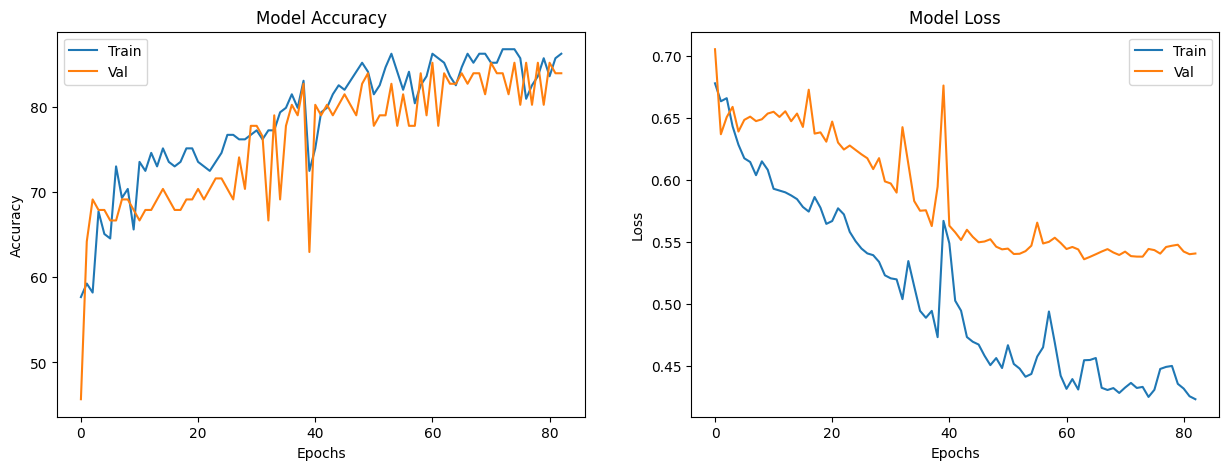

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [19]:
# read test file
#test_data = pd.read_csv('/content/drive/MyDrive/heart_dataset_test.csv')
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()
test_data = test_data.drop(columns=["chol", "fbs", "restecg", "trestbps"])

In [20]:
test_data.isnull().sum()

age        0
sex        0
cp         0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [21]:
test_data = test_data.values
test_data.shape

(31, 10)

In [22]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :9]).float()
y_test = torch.from_numpy(test_data[:, 9]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [23]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 87.09677419354838%


C:\Users\user\AppData\Local\Temp\ipykernel_9552\1852124976.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_classification.pth'))
